# Libraries

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline
import matplotlib.dates as mdates
from datetime import datetime

# Set style for better visuals
plt.style.use('seaborn')

/tmp/ipykernel_10342/3166615292.py:9: MatplotlibDeprecationWarning: The seaborn styles shipped by Matplotlib are deprecated since 3.6, as they no longer correspond to the styles shipped by seaborn. However, they will remain available as 'seaborn-v0_8-<style>'. Alternatively, directly use the seaborn API instead.
  plt.style.use('seaborn')


# Dataset Loading

In [2]:
df = pd.read_csv('./dataset/bustabit.csv')

# EDA

In [3]:
df.head()

,Id,GameID,Username,Bet,CashedOut,Bonus,Profit,BustedAt,PlayDate
0,14196549,3366002,papai,5,1.20,0.0,1.00,8.24,2016-11-20T19:44:19Z
1,10676217,3343882,znay22,3,NaN,NaN,NaN,1.40,2016-11-14T14:21:50Z
2,15577107,3374646,rrrrrrrr,4,1.33,3.0,1.44,3.15,2016-11-23T06:39:15Z
3,25732127,3429241,sanya1206,10,NaN,NaN,NaN,1.63,2016-12-08T18:13:55Z
4,17995432,3389174,ADM,50,1.50,1.4,25.70,2.29,2016-11-27T08:14:48Z


# Replacing NaN Values with 0 in DataFrame

In [4]:
df.fillna(0, inplace=True)

In [5]:
df.head()

,Id,GameID,Username,Bet,CashedOut,Bonus,Profit,BustedAt,PlayDate
0,14196549,3366002,papai,5,1.20,0.0,1.00,8.24,2016-11-20T19:44:19Z
1,10676217,3343882,znay22,3,0.00,0.0,0.00,1.40,2016-11-14T14:21:50Z
2,15577107,3374646,rrrrrrrr,4,1.33,3.0,1.44,3.15,2016-11-23T06:39:15Z
3,25732127,3429241,sanya1206,10,0.00,0.0,0.00,1.63,2016-12-08T18:13:55Z
4,17995432,3389174,ADM,50,1.50,1.4,25.70,2.29,2016-11-27T08:14:48Z


# Target Variable Creation

In [6]:
# Convert 'PlayDate' to datetime
df['PlayDate'] = pd.to_datetime(df['PlayDate'])

# Find the last date in the dataset
latest_date = df['PlayDate'].max()

# Group by player and find their last activity date
player_churn_activity = df.groupby('Username')['PlayDate'].max().reset_index()

# Define churn threshold (e.g., 30 days)
churn_threshold_days = 4
player_churn_activity['Churned'] = (
    (latest_date - player_churn_activity['PlayDate']) > pd.Timedelta(days=churn_threshold_days)
).astype(int)

In [7]:
churn_counts = player_churn_activity['Churned'].value_counts()
print(churn_counts)

Churned
1    3245
0     904
Name: count, dtype: int64


In [8]:
player_churn_activity.head(10)

,Username,PlayDate,Churned
0,----------------,2016-11-03 20:26:24+00:00,1
1,--dilib--,2016-11-03 17:35:53+00:00,1
2,-31337-,2016-12-09 20:33:22+00:00,0
3,-Nothing-,2016-12-06 15:27:27+00:00,1
4,-Tachyon,2016-11-01 23:10:05+00:00,1
5,-Y-,2016-10-31 16:48:46+00:00,1
6,-ZYBERPH-,2016-11-18 12:17:08+00:00,1
7,-_-TUYUL-_-,2016-12-06 14:04:37+00:00,1
8,-__---,2016-12-08 20:49:55+00:00,0
9,-i_,2016-11-03 21:11:52+00:00,1


In [9]:
# Merge churn status with original data
df = df.merge(player_churn_activity[['Username', 'Churned']], on='Username')

In [10]:
df.head(5)

,Id,GameID,Username,Bet,CashedOut,Bonus,Profit,BustedAt,PlayDate,Churned
0,14196549,3366002,papai,5,1.20,0.0,1.00,8.24,2016-11-20 19:44:19+00:00,1
1,14371418,3367200,papai,5,1.20,3.0,1.15,1.20,2016-11-21 03:51:34+00:00,1
2,14306198,3366697,papai,5,0.00,0.0,0.00,1.16,2016-11-21 00:28:45+00:00,1
3,15842561,3376103,papai,1,1.05,3.0,0.08,1.70,2016-11-23 16:31:24+00:00,1
4,13098255,3358777,papai,20,1.20,0.0,4.00,3.43,2016-11-18 18:57:36+00:00,1


In [11]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 50000 entries, 0 to 49999
Data columns (total 10 columns):
 #   Column     Non-Null Count  Dtype              
---  ------     --------------  -----              
 0   Id         50000 non-null  int64              
 1   GameID     50000 non-null  int64              
 2   Username   50000 non-null  object             
 3   Bet        50000 non-null  int64              
 4   CashedOut  50000 non-null  float64            
 5   Bonus      50000 non-null  float64            
 6   Profit     50000 non-null  float64            
 7   BustedAt   50000 non-null  float64            
 8   PlayDate   50000 non-null  datetime64[ns, UTC]
 9   Churned    50000 non-null  int64              
dtypes: datetime64[ns, UTC](1), float64(4), int64(4), object(1)
memory usage: 3.8+ MB


In [12]:
unique_players = df['Username'].nunique()

In [13]:
unique_players

4149

In [14]:
df1 = df.groupby('Username')

In [15]:
df1.head()

,Id,GameID,Username,Bet,CashedOut,Bonus,Profit,BustedAt,PlayDate,Churned
0,14196549,3366002,papai,5,1.20,0.0,1.00,8.24,2016-11-20 19:44:19+00:00,1
1,14371418,3367200,papai,5,1.20,3.0,1.15,1.20,2016-11-21 03:51:34+00:00,1
2,14306198,3366697,papai,5,0.00,0.0,0.00,1.16,2016-11-21 00:28:45+00:00,1
3,15842561,3376103,papai,1,1.05,3.0,0.08,1.70,2016-11-23 16:31:24+00:00,1
4,13098255,3358777,papai,20,1.20,0.0,4.00,3.43,2016-11-18 18:57:36+00:00,1
...,...,...,...,...,...,...,...,...,...,...
49995,9979296,3340244,PrisonBreak,4,0.00,0.0,0.00,1.27,2016-11-13 13:53:18+00:00,1
49996,7619064,3329342,Nipar,500,0.00,0.0,0.00,1.42,2016-11-10 11:33:40+00:00,1
49997,7600259,3329261,FDimarin,1,0.00,0.0,0.00,1.58,2016-11-10 11:00:20+00:00,1
49998,16290931,3378860,FokJulleNaaiers,4000,1.20,0.0,800.00,2.47,2016-11-24 11:16:28+00:00,1


# Feature Engineering

In [16]:
df.head()

,Id,GameID,Username,Bet,CashedOut,Bonus,Profit,BustedAt,PlayDate,Churned
0,14196549,3366002,papai,5,1.20,0.0,1.00,8.24,2016-11-20 19:44:19+00:00,1
1,14371418,3367200,papai,5,1.20,3.0,1.15,1.20,2016-11-21 03:51:34+00:00,1
2,14306198,3366697,papai,5,0.00,0.0,0.00,1.16,2016-11-21 00:28:45+00:00,1
3,15842561,3376103,papai,1,1.05,3.0,0.08,1.70,2016-11-23 16:31:24+00:00,1
4,13098255,3358777,papai,20,1.20,0.0,4.00,3.43,2016-11-18 18:57:36+00:00,1


In [17]:
# Step 1: Get the last, second-last, and third-last play dates per player

player_activity = (
    df.sort_values('PlayDate')
    .groupby('Username')['PlayDate']
    .agg([
        ('LastPlayDate', 'last'),  # Most recent play (always exists)
        ('SecondLastPlayDate', lambda x: x.iloc[-2] if len(x) >= 2 else pd.NaT),
        ('ThirdLastPlayDate', lambda x: x.iloc[-3] if len(x) >= 3 else pd.NaT)
    ])
    .reset_index()
)

# Calculate days with fillna(0) at the end
player_activity['DaysSinceLastPlay'] = (latest_date - player_activity['LastPlayDate']).dt.days
player_activity['DaysSinceSecondLastPlay'] = (latest_date - player_activity['SecondLastPlayDate']).dt.days.fillna(0)
player_activity['DaysSinceThirdLastPlay'] = (latest_date - player_activity['ThirdLastPlayDate']).dt.days.fillna(0)

In [18]:
player_activity.head(5)

,Username,LastPlayDate,SecondLastPlayDate,ThirdLastPlayDate,DaysSinceLastPlay,DaysSinceSecondLastPlay,DaysSinceThirdLastPlay
0,----------------,2016-11-03 20:26:24+00:00,2016-11-03 15:05:40+00:00,2016-11-03 06:14:27+00:00,36,37.0,37.0
1,--dilib--,2016-11-03 17:35:53+00:00,2016-11-03 08:48:12+00:00,2016-11-03 08:39:20+00:00,37,37.0,37.0
2,-31337-,2016-12-09 20:33:22+00:00,2016-12-09 19:56:00+00:00,2016-12-09 18:31:58+00:00,0,1.0,1.0
3,-Nothing-,2016-12-06 15:27:27+00:00,2016-12-06 15:01:15+00:00,2016-11-24 19:07:24+00:00,4,4.0,16.0
4,-Tachyon,2016-11-01 23:10:05+00:00,2016-11-01 22:50:26+00:00,2016-11-01 11:17:05+00:00,38,38.0,39.0


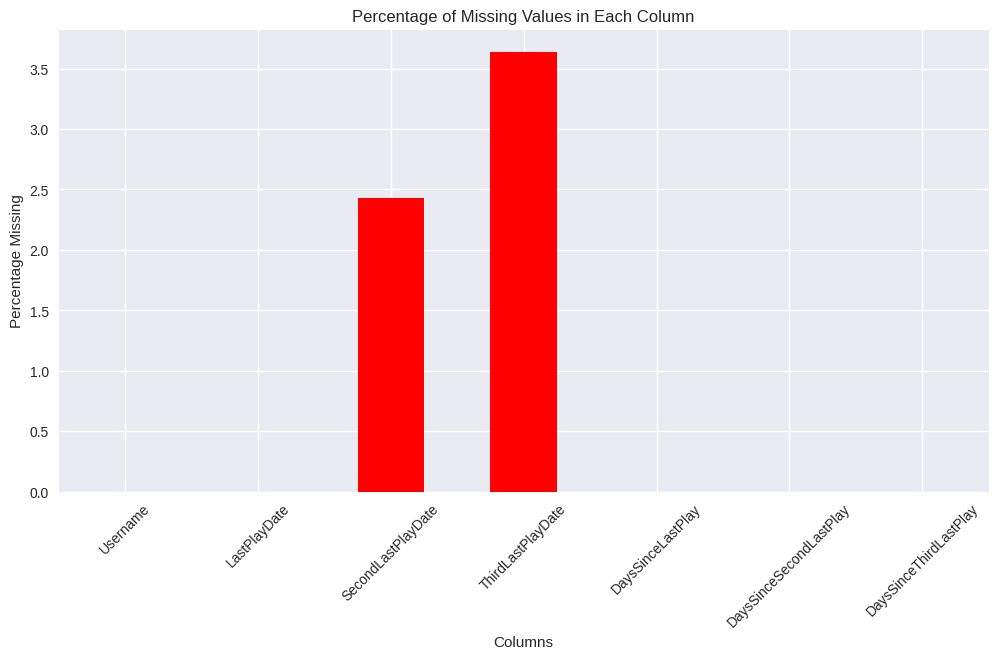

In [19]:
missing_data = player_activity.isnull().sum() / len(df) * 100

plt.figure(figsize=(12, 6))
missing_data.plot(kind='bar', color='red')
plt.title('Percentage of Missing Values in Each Column')
plt.xlabel('Columns')
plt.ylabel('Percentage Missing')
plt.xticks(rotation=45)
plt.grid(True)
plt.show()

In [20]:
# Define the time windows (in days)
time_windows = [4, 8, 12, 16, 20, 24, 28, 32, 36]

# Initialize a DataFrame to store results
player_bets_by_window = df[['Username']].drop_duplicates()

# Calculate bet sums for each time window
for days in time_windows:
    # Calculate cutoff date
    cutoff_date = latest_date - pd.Timedelta(days=days)
    
    # Filter bets and sum by player
    window_bets = (
        df[df['PlayDate'] >= cutoff_date]
        .groupby('Username')['Bet']
        .sum()
        .reset_index()
        .rename(columns={'Bet': f'BetsLast{days}Days'})
    )
    
    # Merge with main DataFrame
    player_bets_by_window = player_bets_by_window.merge(
        window_bets,
        on='Username',
        how='left'
    )

# Fill NA with 0 (for players with no bets in a window)
player_bets_by_window = player_bets_by_window.fillna(0)


In [21]:
player_bets_by_window.head()

,Username,BetsLast4Days,BetsLast8Days,BetsLast12Days,BetsLast16Days,BetsLast20Days,BetsLast24Days,BetsLast28Days,BetsLast32Days,BetsLast36Days
0,papai,0.0,0.0,0.0,0.0,32.0,227.0,227.0,227.0,227.0
1,znay22,826.0,999.0,1092.0,1295.0,1577.0,2097.0,2115.0,2279.0,2663.0
2,rrrrrrrr,40.0,68.0,68.0,68.0,1852.0,2458.0,2458.0,2458.0,2458.0
3,sanya1206,20.0,180.0,180.0,180.0,180.0,180.0,180.0,180.0,180.0
4,ADM,338.0,12338.0,13388.0,13646.0,13646.0,13646.0,13646.0,13846.0,14575.0


In [22]:
player_bets_by_window.shape

(4149, 10)

In [23]:
player_activity.head()

,Username,LastPlayDate,SecondLastPlayDate,ThirdLastPlayDate,DaysSinceLastPlay,DaysSinceSecondLastPlay,DaysSinceThirdLastPlay
0,----------------,2016-11-03 20:26:24+00:00,2016-11-03 15:05:40+00:00,2016-11-03 06:14:27+00:00,36,37.0,37.0
1,--dilib--,2016-11-03 17:35:53+00:00,2016-11-03 08:48:12+00:00,2016-11-03 08:39:20+00:00,37,37.0,37.0
2,-31337-,2016-12-09 20:33:22+00:00,2016-12-09 19:56:00+00:00,2016-12-09 18:31:58+00:00,0,1.0,1.0
3,-Nothing-,2016-12-06 15:27:27+00:00,2016-12-06 15:01:15+00:00,2016-11-24 19:07:24+00:00,4,4.0,16.0
4,-Tachyon,2016-11-01 23:10:05+00:00,2016-11-01 22:50:26+00:00,2016-11-01 11:17:05+00:00,38,38.0,39.0


In [24]:
player_last_activity = player_bets_by_window.merge(player_activity[['Username', 'DaysSinceLastPlay', 'DaysSinceSecondLastPlay', 'DaysSinceThirdLastPlay']], on='Username')

In [25]:
player_last_activity.head()

,Username,BetsLast4Days,BetsLast8Days,BetsLast12Days,BetsLast16Days,BetsLast20Days,BetsLast24Days,BetsLast28Days,BetsLast32Days,BetsLast36Days,DaysSinceLastPlay,DaysSinceSecondLastPlay,DaysSinceThirdLastPlay
0,papai,0.0,0.0,0.0,0.0,32.0,227.0,227.0,227.0,227.0,17,18.0,18.0
1,znay22,826.0,999.0,1092.0,1295.0,1577.0,2097.0,2115.0,2279.0,2663.0,0,0.0,0.0
2,rrrrrrrr,40.0,68.0,68.0,68.0,1852.0,2458.0,2458.0,2458.0,2458.0,1,1.0,3.0
3,sanya1206,20.0,180.0,180.0,180.0,180.0,180.0,180.0,180.0,180.0,0,2.0,4.0
4,ADM,338.0,12338.0,13388.0,13646.0,13646.0,13646.0,13646.0,13846.0,14575.0,2,2.0,3.0


In [26]:
player_stats = df.groupby('Username').agg(
    TotalBetAmount=('Bet', 'sum'),
    TotalProfitAmount=('Profit', 'sum'),
    TotalBonusAmount=('Bonus', 'sum'),
    NumberOfBets=('Bet', 'count'),
    NumberOfBets_Won=('Profit', lambda x: (x > 0).sum()),  # Count wins (Profit > 0)
    NumberOfBets_Lost=('Profit', lambda x: (x <= 0).sum()), # Count losses (Profit <= 0)
    AverageBet=('Bet', 'mean'),
    MaxBet=('Bet', 'max'),
    MinBet=('Bet', 'min'),
    Churned=('Churned', 'first'),
).reset_index().sort_values('TotalBetAmount', ascending=False)

Exception ignored in: <bound method IPythonKernel._clean_thread_parent_frames of <ipykernel.ipkernel.IPythonKernel object at 0x77d3a011e400>>
Traceback (most recent call last):
  File "/home/julhas/Desktop/bustabit_game_prediction/myenv/lib/python3.8/site-packages/ipykernel/ipkernel.py", line 775, in _clean_thread_parent_frames
    def _clean_thread_parent_frames(
KeyboardInterrupt: 


KeyboardInterrupt: 

In [ ]:
player_stats.info()

In [ ]:
player_stats.head(5)

In [ ]:
player_last_activity.info()

In [ ]:
# Merge churn status with original data
final_df = player_stats.merge(player_last_activity[['Username', 'BetsLast4Days','BetsLast8Days','BetsLast12Days','BetsLast16Days','BetsLast20Days','BetsLast24Days','BetsLast28Days','BetsLast32Days','BetsLast36Days', 'DaysSinceLastPlay','DaysSinceSecondLastPlay','DaysSinceThirdLastPlay']], on='Username')

In [ ]:
final_df.head(10)

In [ ]:
final_df.info()

# Correlation Heatmap

In [ ]:
final_df_corr = final_df.drop(['Username'], axis=1)

In [ ]:
import seaborn as sns

In [ ]:
# Calculate correlation matrix
corr_matrix = final_df_corr.corr()

In [ ]:
# Create a heatmap
plt.figure(figsize=(14, 12))
heatmap = sns.heatmap(
    corr_matrix, 
    annot=True,  # Show correlation values in cells
    cmap='coolwarm',  # Color scheme
    vmin=-1, vmax=1,  # Set scale from -1 to 1
    linewidths=0.5,
    annot_kws={'size': 10}
)

# Before Scale the data boxplot

In [ ]:
#final_df_boxplot = final_df_corr.drop(['Churned'], axis=1)

In [ ]:
# Assuming `data` is your DataFrame and 'churned' is binary (0 or 1)
numerical_features = final_df_corr.select_dtypes(include=['int64', 'float64']).columns.tolist()
numerical_features.remove('Churned')  # Exclude target if numerical

In [ ]:
# Plot boxplots for all numerical features
plt.figure(figsize=(20, 14))
for i, feature in enumerate(numerical_features, 1):
    plt.subplot(5, 5, i)  # Adjust subplot grid as needed
    sns.boxplot(x='Churned', y=feature, data=final_df_corr)
    plt.title(f'{feature} vs Churn', weight='bold')
plt.tight_layout()
plt.show()

In [ ]:
# Get top 5 features (highest absolute correlation with 'churned')
# corr_with_target = final_df_corr.corr()[['Churned']].abs().sort_values('Churned', ascending=False)
# top_features = corr_with_target.index[1:7]  # Exclude 'churned' itself

In [ ]:
# # Plot boxplots for top 5 features
# plt.figure(figsize=(14, 8))
# for i, feature in enumerate(top_features, 1):
#     plt.subplot(2, 3, i)
#     sns.boxplot(x='Churned', y=feature, data=final_df_corr, palette='coolwarm')
#     plt.title(f'{feature} vs Churn', weight='bold')
# plt.tight_layout()
# plt.show()

In [ ]:
# Plot histograms for all numerical features
plt.figure(figsize=(16, 12))
for i, feature in enumerate(numerical_features, 1):
    plt.subplot(5, 5, i)  # Adjust grid size as needed
    sns.histplot(data=final_df_corr, x=feature, kde=True, bins=20, color='purple')
    plt.title(f'Distribution of {feature}', fontsize=10, weight='bold')
plt.tight_layout()
plt.show()

# Log Transform before scale data

In [ ]:
final_df_transform = final_df_corr.drop(['Churned'], axis=1)

In [ ]:
final_df_transform.head()

In [ ]:
# Apply log transform (add 1 to avoid log(0))
#data['right_skewed_feature'] = np.log1p(data['right_skewed_felected_feature'])

In [ ]:
final_df_transform = np.log1p(final_df_transform)

In [ ]:
# Assuming `data` is your DataFrame and 'churned' is binary (0 or 1)
numerical_features = final_df_transform.select_dtypes(include=['int64', 'float64']).columns.tolist()
#numerical_features.remove('Churned')  # Exclude target if numerical

In [ ]:
# Plot histograms for all numerical features
plt.figure(figsize=(16, 12))
for i, feature in enumerate(numerical_features, 1):
    plt.subplot(5, 5, i)  # Adjust grid size as needed
    sns.histplot(data=final_df_transform, x=feature, kde=True, bins=20, color='purple')
    plt.title(f'Distribution of {feature}', fontsize=10, weight='bold')
plt.tight_layout()
plt.show()

# Scale the data before training

In [ ]:
cols_to_scale = ['TotalBetAmount','TotalProfitAmount','TotalBonusAmount',
                 'NumberOfBets','NumberOfBets_Won','NumberOfBets_Lost','AverageBet',
                 'MaxBet','MinBet', 'BetsLast4Days','BetsLast8Days','BetsLast12Days','BetsLast16Days',
                 'BetsLast20Days','BetsLast24Days','BetsLast28Days','BetsLast32Days','BetsLast36Days',
                 'DaysSinceLastPlay','DaysSinceSecondLastPlay','DaysSinceThirdLastPlay']

In [ ]:
len(cols_to_scale)

In [ ]:
from sklearn.preprocessing import MinMaxScaler

In [ ]:
scaler = MinMaxScaler()

In [ ]:
#final_df[cols_to_scale] = scaler.fit_transform(final_df[cols_to_scale])
final_df_transform[cols_to_scale] = scaler.fit_transform(final_df_transform[cols_to_scale])

In [ ]:
final_df_transform.head(5)

# After Scale the data boxplot

In [ ]:
final_df_boxplot = final_df.drop(['Username'], axis=1)

In [ ]:
# Assuming `data` is your DataFrame and 'churned' is binary (0 or 1)
numerical_features = final_df_boxplot.select_dtypes(include=['int64', 'float64']).columns.tolist()
numerical_features.remove('Churned')  # Exclude target if numerical

In [ ]:
# Plot boxplots for all numerical features
plt.figure(figsize=(20, 14))
for i, feature in enumerate(numerical_features, 1):
    plt.subplot(5, 5, i)  # Adjust subplot grid as needed
    sns.boxplot(x='Churned', y=feature, data=final_df_boxplot)
    plt.title(f'{feature} vs Churn', weight='bold')
plt.tight_layout()
plt.show()

In [ ]:
# Get top 5 features (highest absolute correlation with 'churned')
corr_with_target = final_df_boxplot.corr()[['Churned']].abs().sort_values('Churned', ascending=False)
top_features = corr_with_target.index[1:7]  # Exclude 'churned' itself

In [ ]:
# Plot boxplots for top 5 features
plt.figure(figsize=(14, 8))
for i, feature in enumerate(top_features, 1):
    plt.subplot(2, 3, i)
    sns.boxplot(x='Churned', y=feature, data=final_df_boxplot, palette='coolwarm')
    plt.title(f'{feature} vs Churn', weight='bold')
plt.tight_layout()
plt.show()

In [ ]:
# Plot histograms for all numerical features
plt.figure(figsize=(16, 12))
for i, feature in enumerate(numerical_features, 1):
    plt.subplot(5, 5, i)  # Adjust grid size as needed
    sns.histplot(data=final_df_boxplot, x=feature, kde=True, bins=20, color='purple')
    plt.title(f'Distribution of {feature}', fontsize=10, weight='bold')
plt.tight_layout()
plt.show()

# Log Transform after scale data

In [ ]:
final_df_boxplot_log = final_df_boxplot.drop(['Churned'], axis=1)

In [ ]:
final_df_boxplot_log.head()

In [ ]:
final_df_transform = np.log1p(final_df_boxplot_log)

In [ ]:
final_df_transform.head()

In [ ]:
# Assuming `data` is your DataFrame and 'churned' is binary (0 or 1)
numerical_features = final_df_transform.select_dtypes(include=['int64', 'float64']).columns.tolist()
#numerical_features.remove('Churned')  # Exclude target if numerical

In [ ]:
# Plot histograms for all numerical features
plt.figure(figsize=(16, 12))
for i, feature in enumerate(numerical_features, 1):
    plt.subplot(5, 5, i)  # Adjust grid size as needed
    sns.histplot(data=final_df_transform, x=feature, kde=True, bins=20, color='purple')
    plt.title(f'Distribution of {feature}', fontsize=10, weight='bold')
plt.tight_layout()
plt.show()

# Separate Features

In [ ]:
#features = final_df.drop(['Username', 'Churned'], axis=1)
features = final_df_transform

In [ ]:
features.head()

# Separate Labels

In [ ]:
labels = final_df['Churned']

In [ ]:
labels.head()

In [ ]:
X = features
y = labels

In [ ]:
from sklearn.model_selection import train_test_split

In [ ]:
X_train, X_test, y_train, y_test = train_test_split(X,y,test_size=0.2,random_state=5)

In [ ]:
X_train.shape

In [ ]:
X_test.shape

In [ ]:
X_train[:10]

In [ ]:
len(X_train.columns)

In [ ]:
import tensorflow as tf
from tensorflow import keras

In [ ]:
# model = keras.Sequential([
#     keras.layers.Dense(21, input_shape=(21,), activation='relu'),  # Note the colon (:) and comma
#     keras.layers.Dense(1, activation='sigmoid')
# ])

# model.compile(optimizer='adam',
#              loss='binary_crossentropy',
#              metrics=['accuracy'])

# model.fit(X_train,y_train, epochs=5)

# model.evaluate(X_test, y_test)

# yp = model.predict(X_test)
# yp[:5]

# y_test[:10]

# y_pred = []
# for element in yp:
#     if element > 0.5:
#         y_pred.append(1)
#     else:
#         y_pred.append(0)

# y_pred[:10]

# print(classification_report(y_test,y_pred))

In [ ]:
model = keras.Sequential([
    keras.layers.Dense(21, input_shape=(21,), activation='relu'),  # Note the colon (:) and comma
    keras.layers.Dense(1, activation='sigmoid')
])

In [ ]:
model.compile(optimizer='adam',
             loss='binary_crossentropy',
             metrics=['accuracy'])

In [ ]:
model.fit(X_train,y_train, epochs=5)

In [ ]:
model.evaluate(X_test, y_test)

In [ ]:
yp = model.predict(X_test)
yp[:5]

In [ ]:
y_test[:10]

In [ ]:
y_pred = []
for element in yp:
    if element > 0.5:
        y_pred.append(1)
    else:
        y_pred.append(0)

In [ ]:
y_pred[:10]

In [ ]:
from sklearn.metrics import confusion_matrix, classification_report, accuracy_score

In [ ]:
print(classification_report(y_test,y_pred))

In [ ]:
import seaborn as sn
cm = tf.math.confusion_matrix(labels=y_test,predictions=y_pred)

plt.figure(figsize= (10,7))
sn.heatmap(cm, annot=True, fmt='d')
plt.xlabel('Prediction')
plt.ylabel('Truth')

In [ ]:
from sklearn.ensemble import RandomForestClassifier  # For classification

In [ ]:
# Split into 70% train, 30% test (adjust test_size as needed)
X_train, X_test, y_train, y_test = train_test_split(
    X, y, 
    test_size=0.2, 
    random_state=5  # For reproducibility
)

In [ ]:
# Initialize the model
rf_model = RandomForestClassifier(
    n_estimators=50,  # Number of trees
    max_depth=5,      # Max depth of each tree
    random_state=5    # For reproducibility
)

# Train the model on the training data
rf_model.fit(X_train, y_train)

In [ ]:
y_pred = rf_model.predict(X_test)

In [ ]:
print("Accuracy:", accuracy_score(y_test, y_pred))
print(classification_report(y_test, y_pred))  # Precision, Recall, F1-score

In [ ]:
import seaborn as sn
cm = tf.math.confusion_matrix(labels=y_test,predictions=y_pred)

plt.figure(figsize= (10,7))
sn.heatmap(cm, annot=True, fmt='d')
plt.xlabel('Prediction')
plt.ylabel('Truth')

In [ ]:
import xgboost as xgb

In [ ]:
# Split into 70% train, 30% test (adjust test_size as needed)
X_train, X_test, y_train, y_test = train_test_split(
    X, y, 
    test_size=0.2, 
    random_state=5  # For reproducibility
)

In [ ]:
# Initialize the XGBoost Classifier
xgb_model = xgb.XGBClassifier(
    objective='binary:logistic',  # For binary classification
    n_estimators=100,            # Number of boosting rounds (trees)
    max_depth=6,                 # Depth of each tree
    learning_rate=0.1,           # Step size shrinkage (default=0.3)
    random_state=42
)

# Train the model
xgb_model.fit(X_train, y_train)

In [ ]:
y_pred = xgb_model.predict(X_test)

In [ ]:
print("Accuracy:", accuracy_score(y_test, y_pred))
print(classification_report(y_test, y_pred))  # Precision, Recall, F1-score
print("Confusion Matrix:\n", confusion_matrix(y_test, y_pred))

In [ ]:
import seaborn as sn
cm = tf.math.confusion_matrix(labels=y_test,predictions=y_pred)

plt.figure(figsize= (10,7))
sn.heatmap(cm, annot=True, fmt='d')
plt.xlabel('Prediction')
plt.ylabel('Truth')

# Logistic Regression

In [ ]:
# Split into train/test sets
X_train, X_test, y_train, y_test = train_test_split(
    X, y, 
    test_size=0.3, 
    random_state=42, 
    stratify=y  # Preserve class balance
)

In [ ]:
from sklearn.linear_model import LogisticRegression

# Initialize the model
logreg = LogisticRegression(
    penalty='l2',           # Regularization (L2 by default)
    C=1.0,                 # Inverse of regularization strength
    solver='lbfgs',        # Good for medium-sized datasets
    max_iter=1000,         # Increase if convergence warning appears
    random_state=42,
    class_weight='balanced' # Handles imbalanced classes
)

# Train the model
logreg.fit(X_train, y_train)

In [ ]:
# Predictions
y_pred = logreg.predict(X_test)

# Evaluation metrics
print("Accuracy:", accuracy_score(y_test, y_pred))
print("\nClassification Report:\n", classification_report(y_test, y_pred))
print("\nConfusion Matrix:\n", confusion_matrix(y_test, y_pred))

# KNN

In [ ]:
from sklearn.neighbors import KNeighborsClassifier

In [ ]:
# Initialize KNN
knn = KNeighborsClassifier(
    n_neighbors=5,      # Number of neighbors (default=5)
    weights='uniform',  # 'uniform' or 'distance' (weight by inverse distance)
    algorithm='auto',   # Auto-select best search algorithm
    p=2                # p=2 for Euclidean distance, p=1 for Manhattan
)

# Train the model
knn.fit(X_train, y_train)

In [ ]:
# Predictions
y_pred = knn.predict(X_test)

# Evaluation metrics
print("Accuracy:", accuracy_score(y_test, y_pred))
print("\nClassification Report:\n", classification_report(y_test, y_pred))
print("\nConfusion Matrix:\n", confusion_matrix(y_test, y_pred))

# Decision Tree

In [ ]:
from sklearn.tree import DecisionTreeClassifier

# Initialize the model
dtree = DecisionTreeClassifier(
    criterion='gini',       # 'gini' or 'entropy' for split quality
    max_depth=5,            # Prevent overfitting by limiting depth
    min_samples_split=10,   # Minimum samples to split a node
    min_samples_leaf=5,     # Minimum samples in a leaf node
    class_weight='balanced', # Handle imbalanced classes
    random_state=42
)

# Train the model
dtree.fit(X_train, y_train)

In [ ]:
# Predictions
y_pred = dtree.predict(X_test)

# Evaluation metrics
print("Accuracy:", accuracy_score(y_test, y_pred))
print("\nClassification Report:\n", classification_report(y_test, y_pred))
print("\nConfusion Matrix:\n", confusion_matrix(y_test, y_pred))

# Class count

In [ ]:
count_class_0, count_class_1 = final_df.Churned.value_counts()

In [ ]:
count_class_0, count_class_1

In [ ]:
df_class_0 = final_df[final_df['Churned'] == 1 ]
df_class_1 = final_df[final_df['Churned'] == 0 ]

In [ ]:
df_class_0.shape

In [ ]:
df_class_1.shape

# Under Sampling

In [ ]:
df_class_0_under = df_class_0.sample(count_class_1, replace=True)

In [ ]:
df_class_0_under.shape

In [ ]:
df_test_under = pd.concat([df_class_0_under, df_class_1], axis=0)

In [ ]:
df_test_under.shape

In [ ]:
print('Random Under Sampling')
print(df_test_under.Churned.value_counts())

In [ ]:
X = df_test_under.drop(['Username', 'Churned'], axis=1)
y = df_test_under['Churned']

In [ ]:
# Split into 70% train, 30% test (adjust test_size as needed)
X_train, X_test, y_train, y_test = train_test_split(
    X, y, 
    test_size=0.2, 
    random_state=5  # For reproducibility
)

## Random Forest Under Sampling

In [ ]:
# Initialize the model
rf_model = RandomForestClassifier(
    n_estimators=50,  # Number of trees
    max_depth=5,      # Max depth of each tree
    random_state=5    # For reproducibility
)

# Train the model on the training data
rf_model.fit(X_train, y_train)

In [ ]:
y_pred = rf_model.predict(X_test)

In [ ]:
print("Accuracy:", accuracy_score(y_test, y_pred))
print(classification_report(y_test, y_pred))  # Precision, Recall, F1-score

## Deep Learning Under Sampling

In [ ]:
model = keras.Sequential([
    keras.layers.Dense(21, input_shape=(21,), activation='relu'),  # Note the colon (:) and comma
    keras.layers.Dense(1, activation='sigmoid')
])

model.compile(optimizer='adam',
             loss='binary_crossentropy',
             metrics=['accuracy'])

model.fit(X_train,y_train, epochs=5)

model.evaluate(X_test, y_test)

yp = model.predict(X_test)
yp[:5]

y_test[:10]

y_pred = []
for element in yp:
    if element > 0.5:
        y_pred.append(1)
    else:
        y_pred.append(0)

y_pred[:10]

print(classification_report(y_test,y_pred))

## Logistic Regression Under Sampleing

In [ ]:
from sklearn.linear_model import LogisticRegression

# Initialize the model
logreg = LogisticRegression(
    penalty='l2',           # Regularization (L2 by default)
    C=1.0,                 # Inverse of regularization strength
    solver='lbfgs',        # Good for medium-sized datasets
    max_iter=1000,         # Increase if convergence warning appears
    random_state=42,
    class_weight='balanced' # Handles imbalanced classes
)

# Train the model
logreg.fit(X_train, y_train)

In [ ]:
# Predictions
y_pred = logreg.predict(X_test)

# Evaluation metrics
print("Accuracy:", accuracy_score(y_test, y_pred))
print("\nClassification Report:\n", classification_report(y_test, y_pred))
print("\nConfusion Matrix:\n", confusion_matrix(y_test, y_pred))

## KNN Under Sampling

In [ ]:
# Initialize KNN
knn = KNeighborsClassifier(
    n_neighbors=5,      # Number of neighbors (default=5)
    weights='uniform',  # 'uniform' or 'distance' (weight by inverse distance)
    algorithm='auto',   # Auto-select best search algorithm
    p=2                # p=2 for Euclidean distance, p=1 for Manhattan
)

# Train the model
knn.fit(X_train, y_train)

In [ ]:
# Predictions
y_pred = knn.predict(X_test)

# Evaluation metrics
print("Accuracy:", accuracy_score(y_test, y_pred))
print("\nClassification Report:\n", classification_report(y_test, y_pred))
print("\nConfusion Matrix:\n", confusion_matrix(y_test, y_pred))

## Decision Tree Under Sampling

In [ ]:
# Initialize the model
dtree = DecisionTreeClassifier(
    criterion='gini',       # 'gini' or 'entropy' for split quality
    max_depth=5,            # Prevent overfitting by limiting depth
    min_samples_split=10,   # Minimum samples to split a node
    min_samples_leaf=5,     # Minimum samples in a leaf node
    class_weight='balanced', # Handle imbalanced classes
    random_state=42
)

# Train the model
dtree.fit(X_train, y_train)

In [ ]:
# Predictions
y_pred = dtree.predict(X_test)

# Evaluation metrics
print("Accuracy:", accuracy_score(y_test, y_pred))
print("\nClassification Report:\n", classification_report(y_test, y_pred))
print("\nConfusion Matrix:\n", confusion_matrix(y_test, y_pred))

# Over Sampling

In [ ]:
count_class_0, count_class_1

In [ ]:
df_class_1_over = df_class_1.sample(count_class_0, replace=True)

In [ ]:
df_class_1_over.shape

In [ ]:
df_test_over = pd.concat([df_class_0, df_class_1_over],axis=0)

In [ ]:
df_test_over.shape

In [ ]:
print('Random over-sampling:')
print(df_test_over.Churned.value_counts())

In [ ]:
X = df_test_over.drop(['Username', 'Churned'], axis=1)
y = df_test_over['Churned']

In [ ]:
# Split into 70% train, 30% test (adjust test_size as needed)
X_train, X_test, y_train, y_test = train_test_split(
    X, y, 
    test_size=0.2, 
    random_state=5  # For reproducibility
)

In [ ]:
# Initialize the model
rf_model = RandomForestClassifier(
    n_estimators=50,  # Number of trees
    max_depth=5,      # Max depth of each tree
    random_state=5    # For reproducibility
)

# Train the model on the training data
rf_model.fit(X_train, y_train)

In [ ]:
y_pred = rf_model.predict(X_test)

In [ ]:
print("Accuracy:", accuracy_score(y_test, y_pred))
print(classification_report(y_test, y_pred))  # Precision, Recall, F1-score

In [ ]:
model = keras.Sequential([
    keras.layers.Dense(21, input_shape=(21,), activation='relu'),  # Note the colon (:) and comma
    keras.layers.Dense(1, activation='sigmoid')
])

model.compile(optimizer='adam',
             loss='binary_crossentropy',
             metrics=['accuracy'])

model.fit(X_train,y_train, epochs=5)

model.evaluate(X_test, y_test)

yp = model.predict(X_test)
yp[:5]

y_test[:10]

y_pred = []
for element in yp:
    if element > 0.5:
        y_pred.append(1)
    else:
        y_pred.append(0)

y_pred[:10]

print(classification_report(y_test,y_pred))

## Logistic Regression Over Sampling

In [ ]:
# Initialize the model
logreg = LogisticRegression(
    penalty='l2',           # Regularization (L2 by default)
    C=1.0,                 # Inverse of regularization strength
    solver='lbfgs',        # Good for medium-sized datasets
    max_iter=1000,         # Increase if convergence warning appears
    random_state=42,
    class_weight='balanced' # Handles imbalanced classes
)

# Train the model
logreg.fit(X_train, y_train)

In [ ]:
# Predictions
y_pred = logreg.predict(X_test)

# Evaluation metrics
print("Accuracy:", accuracy_score(y_test, y_pred))
print("\nClassification Report:\n", classification_report(y_test, y_pred))
print("\nConfusion Matrix:\n", confusion_matrix(y_test, y_pred))

## KNN Over Sampling

In [ ]:
# Initialize KNN
knn = KNeighborsClassifier(
    n_neighbors=5,      # Number of neighbors (default=5)
    weights='uniform',  # 'uniform' or 'distance' (weight by inverse distance)
    algorithm='auto',   # Auto-select best search algorithm
    p=2                # p=2 for Euclidean distance, p=1 for Manhattan
)

# Train the model
knn.fit(X_train, y_train)

In [ ]:
# Predictions
y_pred = knn.predict(X_test)

# Evaluation metrics
print("Accuracy:", accuracy_score(y_test, y_pred))
print("\nClassification Report:\n", classification_report(y_test, y_pred))
print("\nConfusion Matrix:\n", confusion_matrix(y_test, y_pred))

## Decision Tree Over Sampling

In [ ]:
# Initialize the model
dtree = DecisionTreeClassifier(
    criterion='gini',       # 'gini' or 'entropy' for split quality
    max_depth=5,            # Prevent overfitting by limiting depth
    min_samples_split=10,   # Minimum samples to split a node
    min_samples_leaf=5,     # Minimum samples in a leaf node
    class_weight='balanced', # Handle imbalanced classes
    random_state=42
)

# Train the model
dtree.fit(X_train, y_train)

In [ ]:
# Predictions
y_pred = dtree.predict(X_test)

# Evaluation metrics
print("Accuracy:", accuracy_score(y_test, y_pred))
print("\nClassification Report:\n", classification_report(y_test, y_pred))
print("\nConfusion Matrix:\n", confusion_matrix(y_test, y_pred))

# SMOTE

In [ ]:
X = final_df.drop(['Username', 'Churned'], axis=1)
y = final_df['Churned']

In [ ]:
y.value_counts()

In [ ]:
from imblearn.over_sampling import SMOTE

In [ ]:
smote = SMOTE(sampling_strategy='minority')

In [ ]:
X_sm, y_sm = smote.fit_resample(X,y)

In [ ]:
y_sm.value_counts()